# **First Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

# **INC 5000 Companies**

# **About the Dataset**
## **Dataset containing information about each company on the INC 5000 list in 2019. Fields include the company name, industry, founding year, website, and location, as well as 2019 revenue, % growth, number of workers (year-over-year), and the number of years on the list.**

# **Recommended Analysis**
## **1.What's the average revenue among companies on the list? Broken down by industry?**

## **2.Which industries are most and least represented in the list?**

## **3.Do you notice any interesting geographic trends? --->Divide the whole data of states into zones and then find out the trends**

## **4.Which industries saw the largest average growth rate?**

# **Importing A Dataset For Analysis**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IMPORT/INC 5000 Companies 2019.csv')
df.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


# **Checking Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


# **Checking Null Values**

In [ ]:
df.isnull().sum()

rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64

# As **Revenue_Column** Is **"Object"** Datatype So, We Have Converted **"Object"** Datatype Into **"Float"** .


In [ ]:
df['revenue']=df['revenue'].replace({'Million':"","Billion":"*1000"},regex=True).map(pd.eval)

In [ ]:
df['revenue'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   float64
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 548.3+ KB


# Renaming **"Revenue_Column"**

In [ ]:
df.rename(columns = {'revenue':'revenue_in_millions'},inplace=True)

# As We Are Having Null Values In Metro Column Which Has Datatype **"Object"** So To Deal With **Null_Values** Of **"Metro_Column"** We Have Taken **MODE** Of **"Metro_Column"** And Replace That **Null_Values** With Mode Values .



**Q**. Why we use only the mode function to fill the null values?

Ans. The mode is a measure of central tendency that represents the value that appears most frequently in a dataset. It is often used to fill null values in a dataset because it is a simple and effective way to estimate the missing values based on the most common value in the dataset.


In [ ]:
df['metro'].mode()

0    New York City
Name: metro, dtype: object

In [ ]:
df['metro'].mode()[0]

'New York City'

In [ ]:
metro_mode=df['metro'].mode()

In [ ]:
metro_mode

0    New York City
Name: metro, dtype: object

In [ ]:
df['metro'].fillna(metro_mode)

0            Phoenix
1          Nashville
2             Austin
3                NaN
4       Philadelphia
            ...     
5007         Houston
5008         Chicago
5009             NaN
5010       San Diego
5011             NaN
Name: metro, Length: 5012, dtype: object

In [ ]:
df['metro'].fillna(metro_mode[0])

0             Phoenix
1           Nashville
2              Austin
3       New York City
4        Philadelphia
            ...      
5007          Houston
5008          Chicago
5009    New York City
5010        San Diego
5011    New York City
Name: metro, Length: 5012, dtype: object

In [ ]:
df['metro'].fillna(metro_mode[0],inplace=True)

In [ ]:
df['metro'].isnull().sum()

0

In [ ]:
df.head()

,rank,profile,name,url,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,New York City,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [ ]:
df.isnull().sum()

rank                   0
profile                0
name                   0
url                    0
state                  0
revenue_in_millions    0
growth_%               0
industry               0
workers                1
previous_workers       0
founded                0
yrs_on_list            0
metro                  0
city                   0
dtype: int64

 # Secondly We Have "**One**" **Null_value** In "**Workers_Column**" So We Have Dropped **"Null_value"** , As It Is In Very Less Amount Of About 0.02 % .

In [ ]:
df['workers'].isnull().sum()

1

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df['workers'].isnull().sum()

0

In [ ]:
df.isnull().sum()

rank                   0
profile                0
name                   0
url                    0
state                  0
revenue_in_millions    0
growth_%               0
industry               0
workers                0
previous_workers       0
founded                0
yrs_on_list            0
metro                  0
city                   0
dtype: int64

In [ ]:
df.head()

,rank,profile,name,url,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,New York City,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


# **DATA VISUALIZATION**



# What's The Average Revenue Among Companies On The List ? Broken Down By Industry?

 # We Have Calculated The "MEAN" Of Revenue_In_Millions

In [ ]:
industry_revenue = df.groupby('industry')['revenue_in_millions'].mean().sort_values(ascending=True)
industry_revenue

industry
Media                            16.708696
Advertising & Marketing          18.908384
IT Services                      19.130233
Education                        20.835714
IT System Development            21.088333
Software                         21.573970
Environmental Services           22.506977
IT Management                    22.577536
Travel & Hospitality             26.736842
Business Products & Services     28.601829
Computer Hardware                31.178125
Engineering                      32.954321
Manufacturing                    33.303315
Real Estate                      34.061111
Food & Beverage                  39.855906
Financial Services               40.004184
Telecommunications               41.825316
Construction                     58.422571
Insurance                        58.742857
Government Services              59.391949
Retail                           66.552761
Consumer Products & Services     72.295223
Human Resources                  73.582166
En

<Axes: xlabel='industry'>

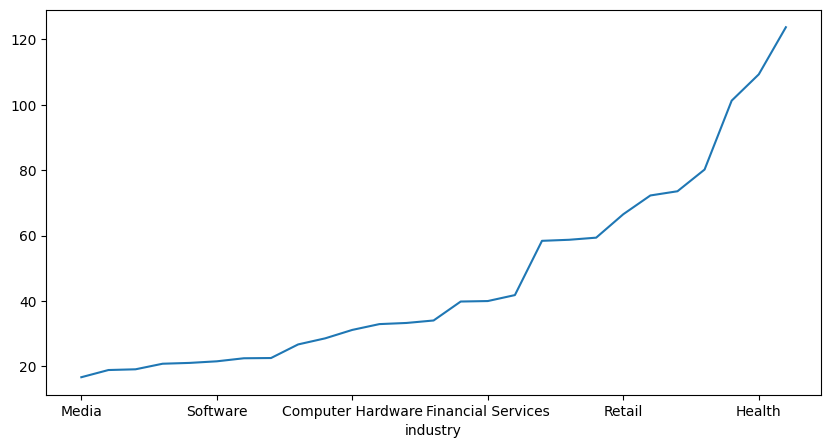

In [ ]:
import matplotlib.pyplot as plt
industry_revenue.plot(figsize=(10,5))

In [ ]:
import seaborn as sns

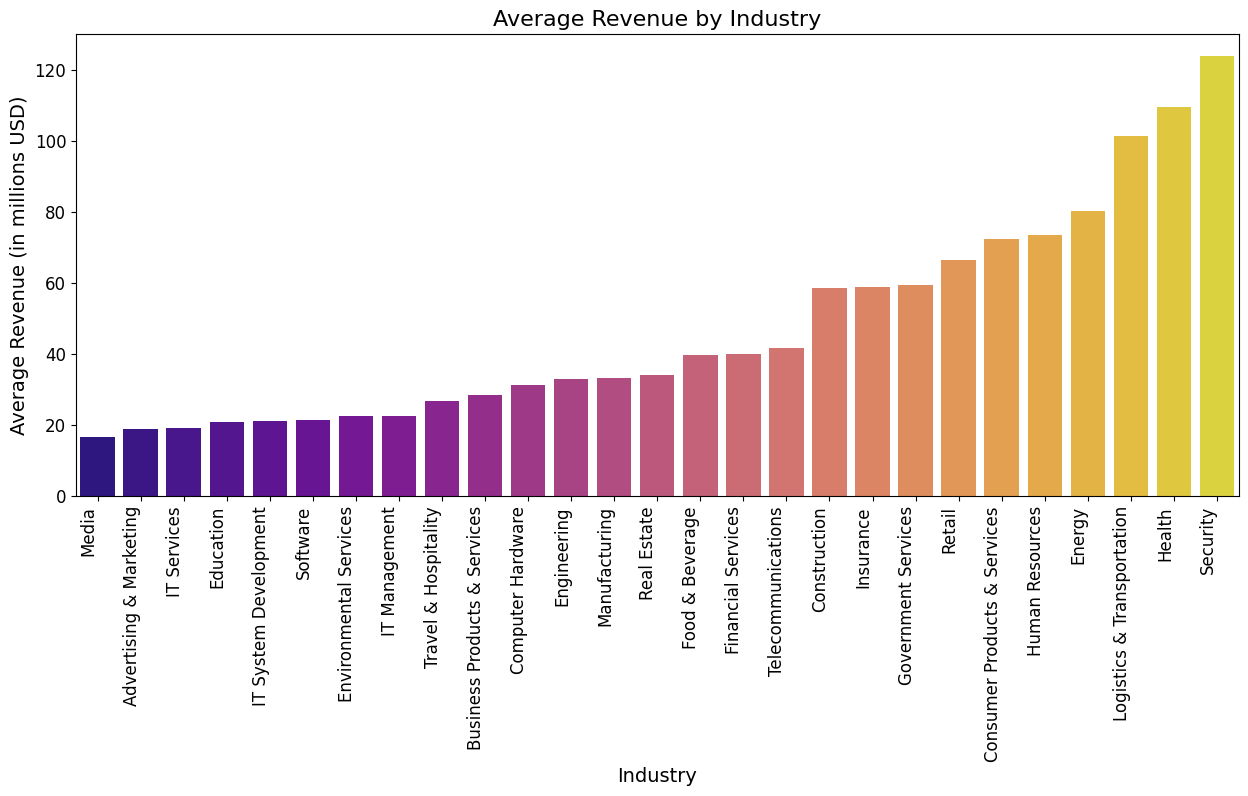

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=industry_revenue.index, y=industry_revenue.values, palette="plasma")
plt.title('Average Revenue by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Revenue (in millions USD)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 # The Highest Average Revenue Is In The **"Security_Industry"** At **123_Million_Dollars**, Followed By **"Health"** At **109_Million_Dollars** And **"Logistics_&_Transportation"** at **101_Million_Dollars** .              On The Other Hand , **"Advertising_&_Marketing"** Has The Lowest Average Revenue At "**18_Million_Dollars**" , Followed By Education At "**20_Million_Dollars**" And Media At **"16_Million_Dollars"** .

# Which Industries Are Most And Least Represented In The List ?

In [ ]:
df['industry'].value_counts()

Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    314
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: industry, dtype: int64

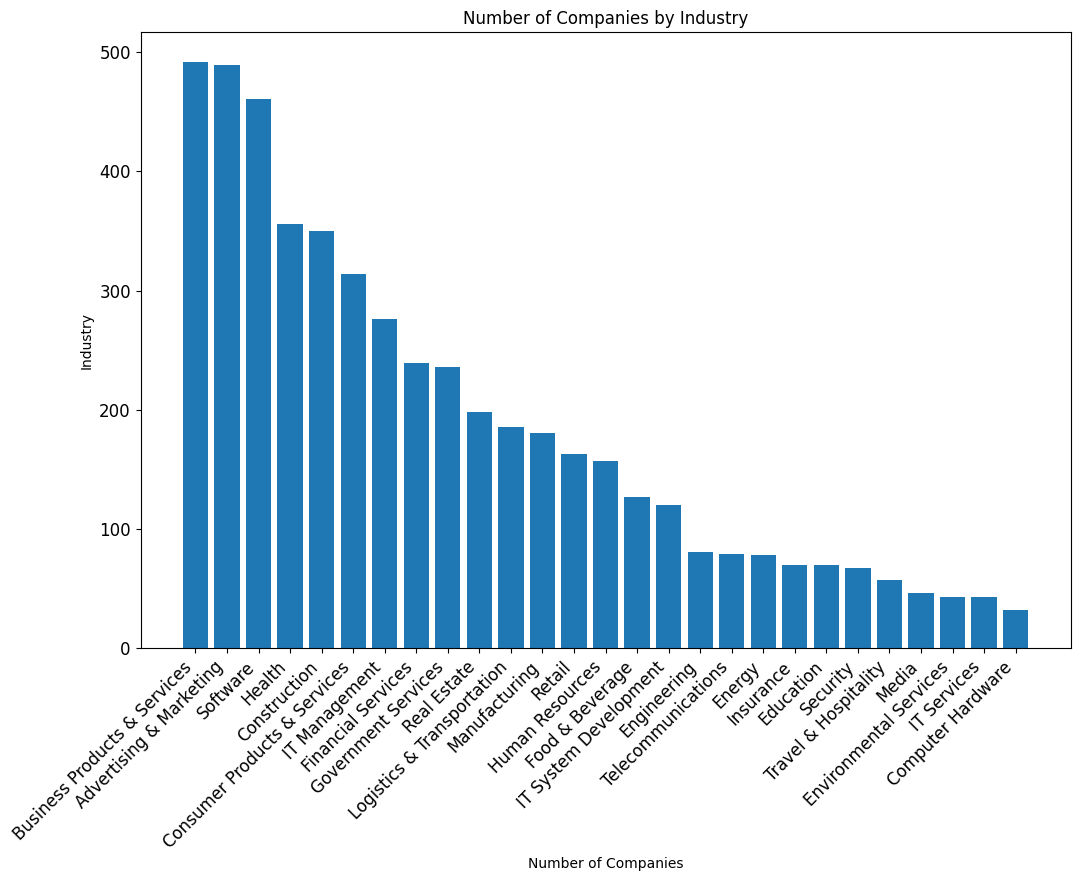

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(industry_counts.index, industry_counts.values)
plt.title('Number of Companies by Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# The Most Represented Industries On The List : "**Business_Products_&_Services**" , "**Advertising_&_Marketing_Software**" Which HaS Over 400 Companies Listed.

# The Least Represented Industries On The List Are : "**Environmental_Services**" , "**IT Services_&_Computer"** Hardware Which Has Less Than 40 Companies Listed.

# Do You Notice Any Interesting Geographic Trends ?

In [ ]:
df['state'].value_counts()

CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
DE     11
ME     11
MT     11
ND     10
AR     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: state, dtype: int64

In [ ]:
state_data=df['state'].value_counts()

Text(0, 0.5, 'Count')

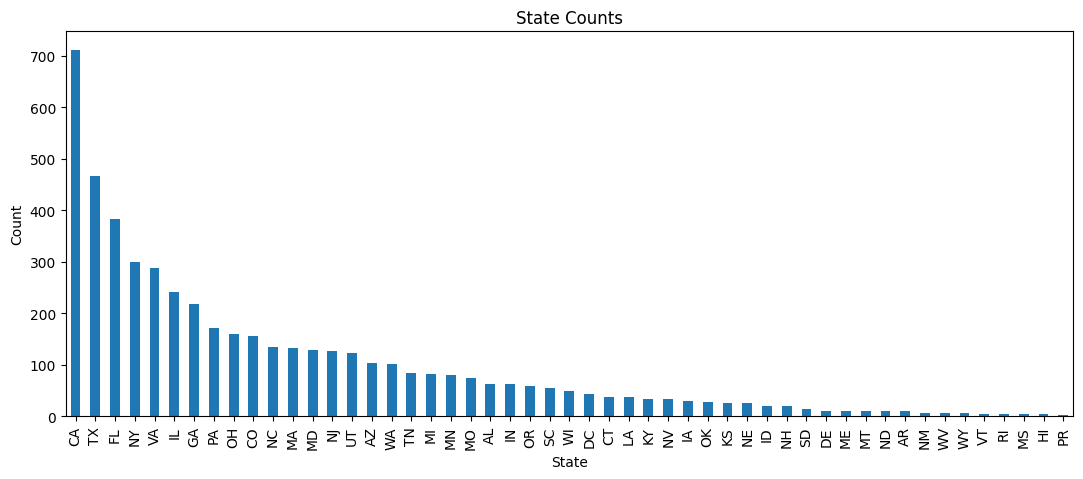

In [ ]:
state_data.plot(kind='bar',figsize=(13,5))
plt.title('State Counts')
plt.xlabel('State')
plt.ylabel('Count')


# Top 5 States With The Highest Number Of Companies : California (712), Texas (467), Florida (384), New York (300), and Virginia (288).

 # The Lowest Number Of Companies : Mississippi, Hawaii , And Pennsylvania ,N Each With Only One Company.

# Which Industries Saw The Largest Average Growth Rate?

In [ ]:
industry_growth = df.groupby('industry')['growth_%'].mean().sort_values()
industry_growth

industry
IT Services                      70.583881
Engineering                     222.757926
IT Management                   275.364626
Human Resources                 288.708354
Insurance                       306.150356
Business Products & Services    313.472373
Manufacturing                   333.701503
Travel & Hospitality            346.417214
Construction                    358.093255
Education                       384.560157
IT System Development           385.909106
Media                           413.729200
Real Estate                     417.554633
Financial Services              423.942329
Environmental Services          458.554665
Government Services             485.308360
Advertising & Marketing         486.685136
Security                        490.193593
Telecommunications              515.411890
Software                        524.673761
Health                          546.911881
Retail                          584.823802
Energy                          592.075591
Co

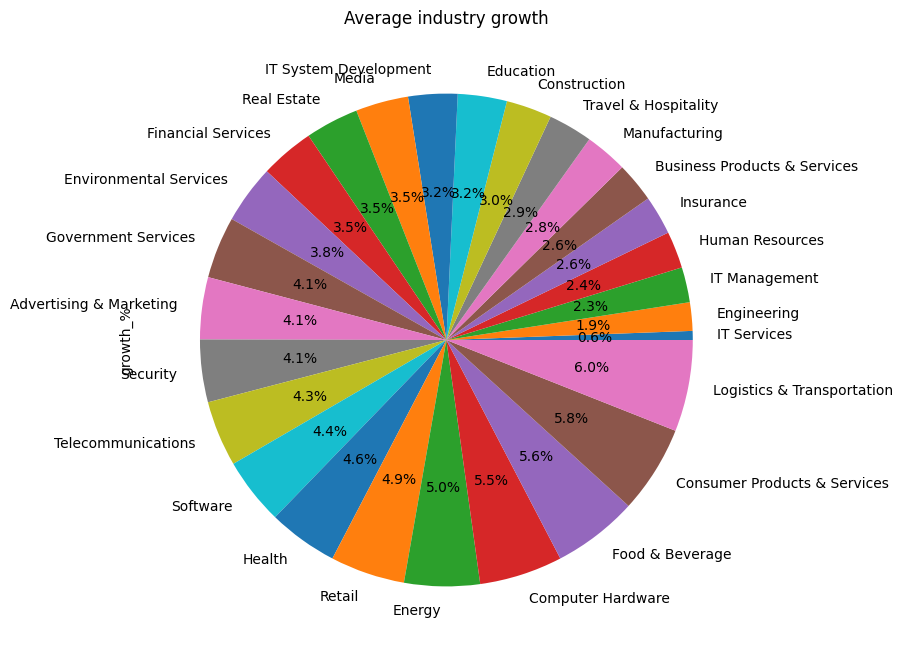

In [ ]:
import matplotlib.pyplot as plt

# create a DataFrame from the industry_growth Series
industry_growth_df = pd.DataFrame(industry_growth)

# create a pie chart from the DataFrame
industry_growth_df.plot.pie(y='growth_%', legend=False, autopct='%1.1f%%', figsize=(8, 8))

# set the title
plt.title('Average industry growth')

# display the plot
plt.show()

# From The Top 10 Industries With The Largest Average Growth Rate : Logistics And Transportation, Food And Beverage, And Consumer Products And Services Had The Largest Average Growth Rates, All Above 600 %.

Text(0.5, 1.0, 'Mean Growth % by Industry')

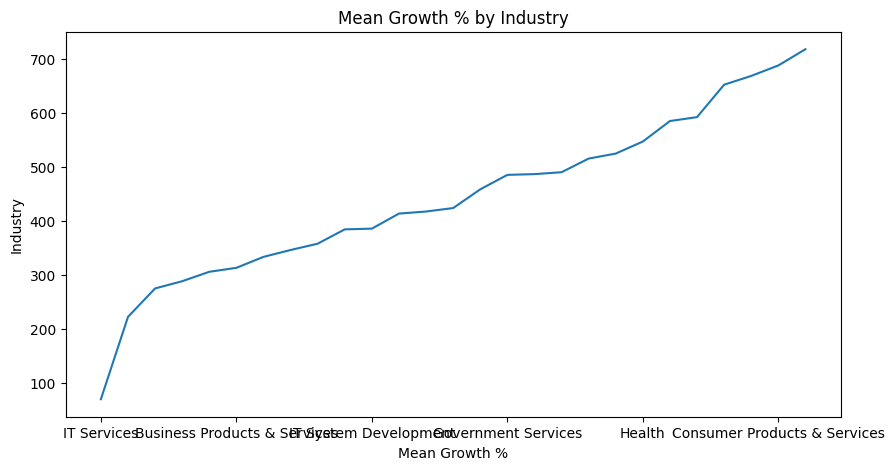

In [ ]:
industry_growth.plot(figsize=(10,5))
plt.xlabel('Mean Growth %')
plt.ylabel('Industry')
plt.title('Mean Growth % by Industry')

# **Conclusion**
Based on the exploratory data analysis (EDA) performed on the companies dataset, the following conclusions can be drawn:

In summary, the companies dataset contains valuable information on the financial performance of over 5000 companies across various industries. It reveals that the average revenue for companies in the dataset is substantial, indicating the presence of large and successful companies. Additionally, the technology industry has a dominant presence in the dataset, reflecting the rapid growth and importance of the technology sector in the economy. The dataset also highlights a positive correlation between revenue and the number of workers, but with significant variations in the number of workers required to generate revenue across different companies. Furthermore, the dataset uncovers some rare cases where companies were able to increase revenue while reducing staff, indicating the possibility of operational efficiency in such cases. Lastly, the dataset provides useful insights into the revenue growth rates of different companies, indicating a diverse range of growth rates from highly successful to negative. Overall, the dataset offers an excellent opportunity for further investigation into the factors that drive a company's success or failure.
